Given a classified data set, the aim is to predict the TARGET CLASS.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading csv file into data frame
df = pd.read_csv('../input/KNN_Project_Data')
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


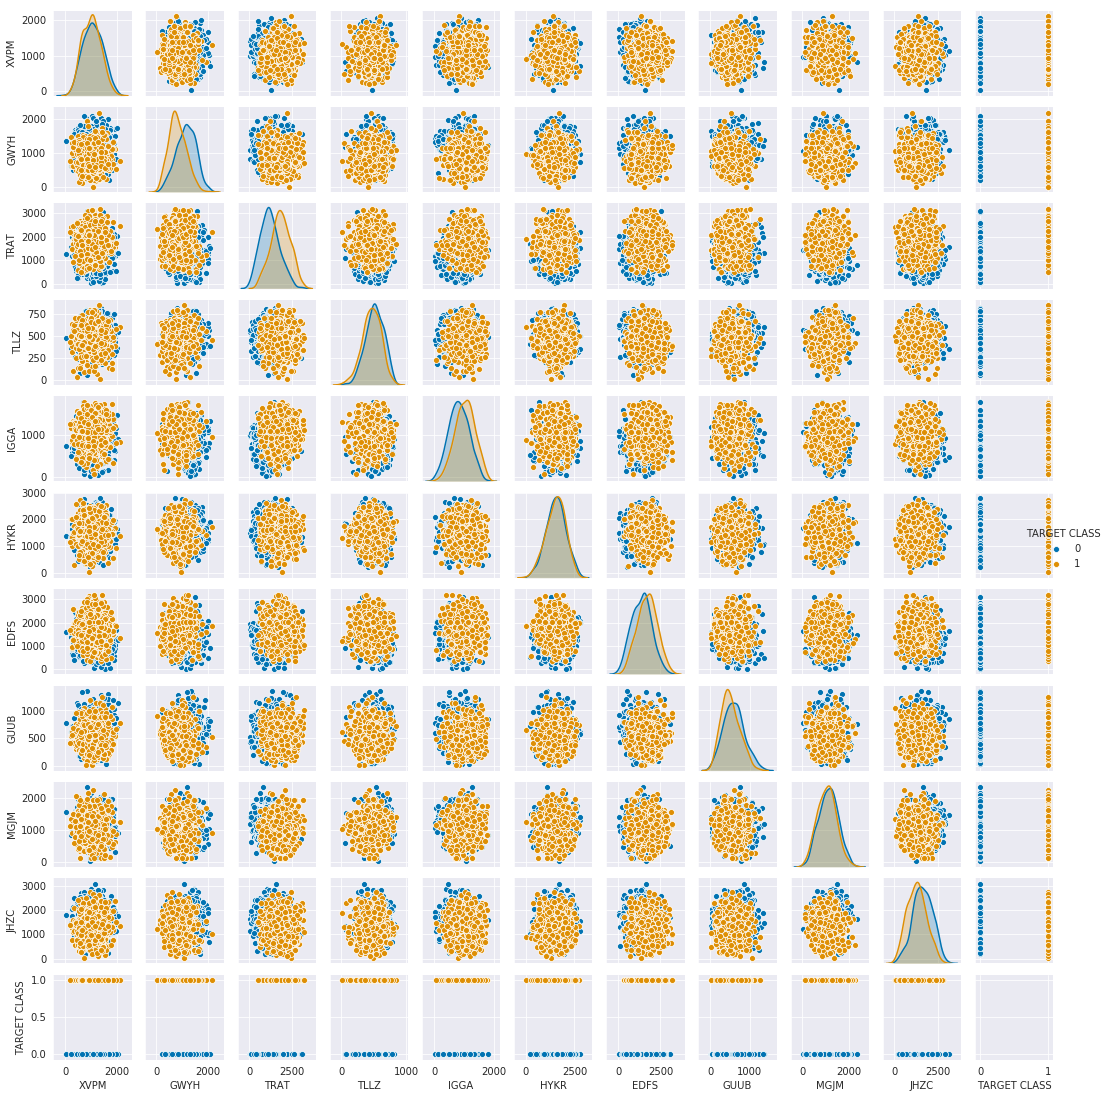

In [3]:
#performing exploratory data analysis
sns.set_style('darkgrid')
sns.pairplot(df, hue='TARGET CLASS', palette='colorblind').fig.set_size_inches(15,15)

In [4]:
#standardizing numerical variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS', axis=1))
scaled_features = scaler.transform(df.drop('TARGET CLASS', axis=1))
df_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1])
df_scaled.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1.568522,-0.443435,1.619808,-0.958255,-1.128481,0.138336,0.980493,-0.932794,1.008313,-1.069627
1,-0.112376,-1.056574,1.741918,-1.504220,0.640009,1.081552,-1.182663,-0.461864,0.258321,-1.041546
2,0.660647,-0.436981,0.775793,0.213394,-0.053171,2.030872,-1.240707,1.149298,2.184784,0.342811
3,0.011533,0.191324,-1.433473,-0.100053,-1.507223,-1.753632,-1.183561,-0.888557,0.162310,-0.002793
4,-0.099059,0.820815,-0.904346,1.609015,-0.282065,-0.365099,-1.095644,0.391419,-1.365603,0.787762


In [5]:
#splitting dataframe into train and test
X = df.drop('TARGET CLASS', axis=1)
y = df['TARGET CLASS']

In [6]:
X.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792


In [7]:
y.head()

0    0
1    1
2    1
3    0
4    0
Name: TARGET CLASS, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=101)

In [9]:
#Using KNN for this prediction
from sklearn.neighbors import KNeighborsClassifier
#trying with k=1
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)


In [10]:
#evaluating model performance
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, prediction))
confusion_matrix(y_test, prediction)

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       152
           1       0.74      0.74      0.74       148

   micro avg       0.74      0.74      0.74       300
   macro avg       0.74      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



array([[113,  39],
       [ 39, 109]])

Text(0,0.5,'Error Rate')

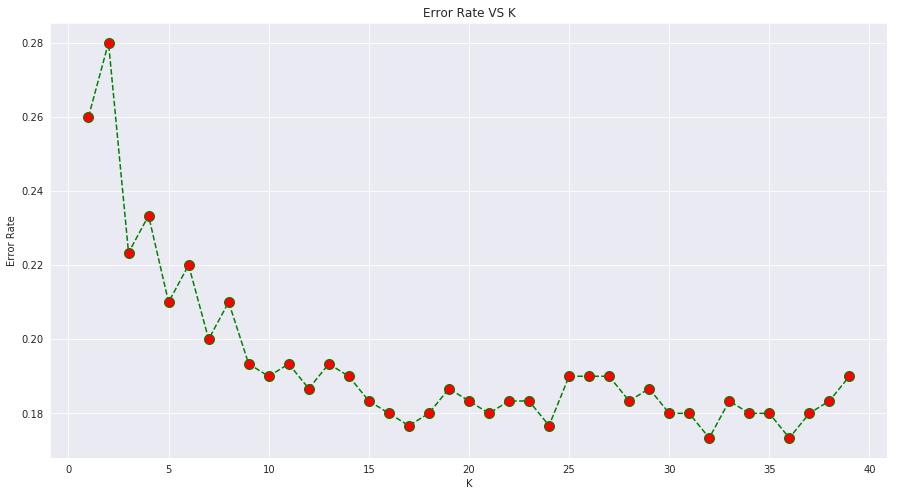

In [11]:
#Using elbow method to find optimal k
error_rate=[]
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    prediction_i = knn.predict(X_test)
    error_rate.append(np.mean(prediction_i != y_test))
sns.set_style('darkgrid')
plt.figure(figsize=(15,8))
plt.plot(range(1,40), error_rate, marker='o', markerfacecolor='red', linestyle='dashed', color='green', markersize=10)
plt.title('Error Rate VS K')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [12]:
#Good values for k appear to be 24, 32, 36
#trying k = 24
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print(classification_report(y_test, prediction))
confusion_matrix(y_test, prediction)
#The score improves significantly from 74 to 82%.

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       152
           1       0.81      0.83      0.82       148

   micro avg       0.82      0.82      0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



array([[124,  28],
       [ 25, 123]])

In [13]:
#trying k = 32
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print(classification_report(y_test, prediction))
confusion_matrix(y_test, prediction)

              precision    recall  f1-score   support

           0       0.83      0.82      0.82       152
           1       0.81      0.83      0.82       148

   micro avg       0.82      0.82      0.82       300
   macro avg       0.82      0.82      0.82       300
weighted avg       0.82      0.82      0.82       300



array([[124,  28],
       [ 25, 123]])

In [14]:
#trying k = 36
knn = KNeighborsClassifier(n_neighbors=36)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
print(classification_report(y_test, prediction))
confusion_matrix(y_test, prediction)

              precision    recall  f1-score   support

           0       0.84      0.81      0.83       152
           1       0.81      0.84      0.83       148

   micro avg       0.83      0.83      0.83       300
   macro avg       0.83      0.83      0.83       300
weighted avg       0.83      0.83      0.83       300



array([[123,  29],
       [ 23, 125]])

Therefore, the optimal k is 24 with 83% precision.